## Plan:
1. EDA on train data, find out summary including shape, data type, data distribution, if it contains missing/null values.
2. Clean data
3. Train Test split
4. Fix missing data
5. Feature selection (Correlation on numerical features, boxplot on categorical features, automatically select the most informative)
6. Encode categorical variables
7. Build Model (Ensemble: RandomTreeForest, XGBoost, etc)
8. Evaluation

In [1]:
# import requried libraries for data wrangling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import training data
data = pd.read_csv('train.csv', index_col= 'Id')

In [3]:
# check columns
print(data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
# drop columns that contain more than 30% null values 
data = data.drop([col for col in data.columns if data[col].isnull().sum()/data.shape[0] > 0.3], axis= 1)

In [5]:
# set target varaible 
Y = data['SalePrice']
# drop target column, as well as columns that contain leakage information
leak_cols = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
X = data.drop(['SalePrice'] + leak_cols, axis = 1)

In [6]:
# Check the unique column types
X.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
# create lists that contain numerical and categorical column names
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
# check the size of these two lists
print('There are {} numerical columns'.format(len(num_cols)))
print('And {} categorical columns'.format(len(cat_cols)))

There are 34 numerical columns
And 36 categorical columns


In [8]:
pd.set_option('display.max_columns', 500)
X[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [9]:
X[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
MSZoning        1460 non-null object
Street          1460 non-null object
LotShape        1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1452 non-null object
ExterQual       1460 non-null object
ExterCond       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtF

### 1). Start off with a Baseline model:
1. use only numerical features in the dataset
2. impute missing value with mean

In [10]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# train split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)
X_bl_train = X_train[num_cols]
X_bl_test = X_test[num_cols]
# impute missing value
# create a list that contains the names of columns with missing entries
missing_cols_bl = [col for col in X_bl_train if X_bl_train[col].isnull().any() == True]
# keep track of which entries are imputed
for col in missing_cols_bl:
    X_bl_train[col + '_missing'] = X_bl_train[col].isnull()
    X_bl_test[col + '_missing'] = X_bl_test[col].isnull()
# impute missing value with column mean
imputer_bl = SimpleImputer()
imputed_X_bl_train = pd.DataFrame(imputer_bl.fit_transform(X_bl_train), columns = X_bl_train.columns)
imputed_X_bl_test = pd.DataFrame(imputer_bl.transform(X_bl_test), columns= X_bl_test.columns)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# define a function for baseline model genereation and model evaluation
def bl_score(X_train, X_test, Y_train, Y_test):
    # create a XGBRegressor model and fit using training data
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
    model.fit(X_train, Y_train)
    # make out-of-sample and in-sample predictions
    Y_predict_outsample = model.predict(X_test)
    Y_predict_insample = model.predict(X_train)
    # calculate the mean absolute error of out-of-sample and in-sample predictions
    outsample_MAE = mean_absolute_error(Y_predict_outsample, Y_test)
    insample_MAE = mean_absolute_error(Y_predict_insample, Y_train)
    return outsample_MAE, insample_MAE

# apply score funciton to baseline training and testing data
bl_outsample_error, bl_insample_error = bl_score(imputed_X_bl_train, imputed_X_bl_test, Y_train, Y_test)
# print out-of-sample and in-sample prediction errors
print('Out-of-Sample mean-absolute-error is: {}'.format(bl_outsample_error))
print('In-Sample mean-absolute-error is: {}'.format(bl_insample_error))

[22:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Out-of-Sample mean-absolute-error is: 15134.871468321919
In-Sample mean-absolute-error is: 5988.2507491438355


### Based on the result shown from the baseline mode, we can see that the In-Sample MAE is pretty significant, which indicates that the model might be slightly underfitting. This makes sense because we have not considered the categorical variables yet, which might contain a lot of useful information. Additionally, there is clearly a huge difference between the Out-of-Sample MAE and In-Sample MAE. This suggests that there is a high variance produced by our model. In order to minimize this, we need to be more selective about our features and potentially use regularization. 

### 2). Feature Engineering on numerical columns
For numerical features, we need to find the ones with high correlation with the target variable. Meanwhile, any two highly correlated variables might carry redundant information, and we should consider dropping one of them in hope of preventing overfitting

In [12]:
# Find correlation between all numerical features as well as the target variable
corr_data = pd.DataFrame(data[['SalePrice'] + num_cols].corr())

In [13]:
# create a list that contains features whose correlation with target variable is greater than 0.4
high_corr_ft = corr_data.index[np.abs(corr_data.SalePrice) >= 0.4].to_list()
high_corr_ft.remove('SalePrice')
print('There are {} features that could be potential predictors of final price:\n {}'.format(len(high_corr_ft), high_corr_ft))

There are 13 features that could be potential predictors of final price:
 ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [14]:
# import required library
from scipy import stats
# double check features that are correlated with the target variable, 
# and assess its statistical significance with p-value using Pearson Correlation
for feature in high_corr_ft:
    # create a temporary dataframe for the feature and target variables
    temp_df = pd.DataFrame(X[feature]).join(Y)
    # drop rows with missing entries
    temp_df.dropna(inplace = True)
    pearson_coef, p_value = stats.pearsonr(temp_df[feature], temp_df['SalePrice'])
    print(feature + ":")
    print('The Pearson Correlation Coefficient is: {}, with a P-value: {}\n'.format(pearson_coef, p_value))

OverallQual:
The Pearson Correlation Coefficient is: 0.790981600583805, with a P-value: 2.185675268e-313

YearBuilt:
The Pearson Correlation Coefficient is: 0.5228973328794969, with a P-value: 2.9902290990158995e-103

YearRemodAdd:
The Pearson Correlation Coefficient is: 0.5071009671113861, with a P-value: 3.1649482419207935e-96

MasVnrArea:
The Pearson Correlation Coefficient is: 0.4774930470957156, with a P-value: 1.4585086425879671e-83

TotalBsmtSF:
The Pearson Correlation Coefficient is: 0.6135805515591953, with a P-value: 9.484229391507914e-152

1stFlrSF:
The Pearson Correlation Coefficient is: 0.6058521846919146, with a P-value: 5.394710618971284e-147

GrLivArea:
The Pearson Correlation Coefficient is: 0.7086244776126522, with a P-value: 4.518033646779431e-223

FullBath:
The Pearson Correlation Coefficient is: 0.560663762748446, with a P-value: 1.236470066760862e-121

TotRmsAbvGrd:
The Pearson Correlation Coefficient is: 0.5337231555820281, with a P-value: 2.772280932958432e-108


We can see that the result of Pearson Correlation confirms the correlation of numerical features we have selected. On top of that, the P-values are all close to 0 and well below 0.05, which indicates the correlations are highly statistically significant.
The next step would be to check if any two features above are highly correlated. Two highly correlated features might carry duplicated information, such as speed in m/s vs speed in miles/hr. In these cases, we might consider dropping one of them.

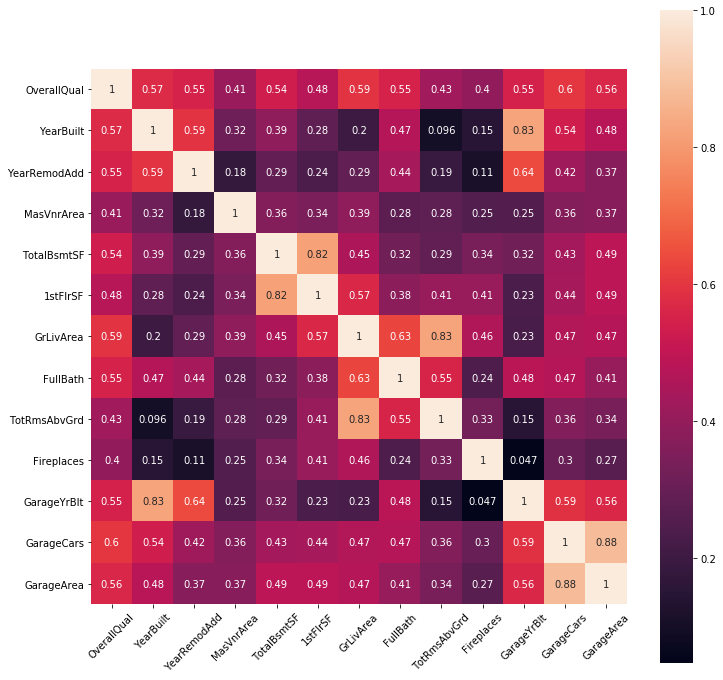

In [15]:
corr_ft = X[high_corr_ft].corr()

plt.figure(figsize= (12, 12))
sns.heatmap(corr_ft, annot= True, square= True)
plt.xticks(rotation = 45)
plt.show()

Using the heatmap above, we can better visualize the correlations between each predictor feature. 
There are couple highly correlated predictor features:
1. 1stFirSF (First Floor square feet) vs. TotalBsmtSF (Total square feet of basement area)
2. TotRmsAbvGrd (total rooms above ground, excluding bathrooms) vs. GrLivArea (Above ground living area square feet)
3. GarageYrBlt (Year garage was built) vs. YearBuilt (Original construction date)
4. GarageArea (Size of garage in square feet) vs. GarageCars (Size of garage in car capcity)

The high correlations among these 4 pairs of predictor features do seem quite intuitive. And we can definitely agree that some of them are conveying similar information. For example, GarageArea and GarageCars are both used to gauge a garage size. 

In terms of deciding which predictor feature to drop: 
1. I will keep the 4 predictor features in the first 2 pairs because I think they are all important attributes for evaluating a house price despite their similarity and high correlation.
2. For the 3rd pair, GarageYrBlt will be dropped since it has a lower correlation with the target.
3. For the 4th pair, GarageCars will be kept because it is a more intuitive and easier way to describe a garage size another person.

In [16]:
X_num_train = X_train.loc[:, high_corr_ft]
X_num_test = X_test.loc[:, high_corr_ft]

drop_high_corr_ft = ['GarageYrBlt', 'GarageArea']

X_num_train.drop(drop_high_corr_ft, axis = 1, inplace = True)
X_num_test.drop(drop_high_corr_ft, axis = 1, inplace = True)

In [17]:
X_num_train.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars
count,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.134418,1971.756849,1985.384418,105.122414,1070.021404,1176.254281,1521.626712,1.571918,6.548801,0.619863,1.774829
std,1.369861,30.291881,20.587897,178.078113,448.141915,395.462440,523.534530,0.546045,1.626478,0.648787,0.734614
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,1954.000000,1968.000000,0.000000,804.000000,888.000000,1133.500000,1.000000,5.000000,0.000000,1.000000
50%,6.000000,1974.000000,1994.000000,0.000000,1007.500000,1098.500000,1470.000000,2.000000,6.000000,1.000000,2.000000
75%,7.000000,2001.000000,2004.000000,170.250000,1314.500000,1422.000000,1790.000000,2.000000,7.000000,1.000000,2.000000
max,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,3.000000,4.000000


In [18]:
X_num_test.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,5.958904,1969.311644,1982.791096,97.976027,1007.061644,1108.116438,1490.811644,1.537671,6.393836,0.585616,1.736301
std,1.428125,29.815506,20.780001,192.693753,395.449324,344.097775,533.387504,0.570120,1.617886,0.628257,0.796675
min,1.000000,1880.000000,1950.000000,0.000000,0.000000,483.000000,605.000000,0.000000,3.000000,0.000000,0.000000
25%,5.000000,1952.000000,1964.000000,0.000000,768.000000,864.000000,1115.500000,1.000000,5.000000,0.000000,1.000000
50%,6.000000,1971.000000,1989.500000,0.000000,937.000000,1016.500000,1454.000000,2.000000,6.000000,1.000000,2.000000
75%,7.000000,1998.000000,2002.000000,121.750000,1217.250000,1297.250000,1725.750000,2.000000,7.000000,1.000000,2.000000
max,10.000000,2009.000000,2010.000000,1378.000000,2633.000000,2633.000000,4476.000000,3.000000,12.000000,3.000000,4.000000
